# Условие

Для автоматической сортировки одного из ключевых продуктов предприятия по двум категориям Вам необходимо разработать модель, которая позволит предсказывать категории этого продукта по показаниям датчиков. Вы договорились, что показателем, характеризующим качество Вашей модели, будет AUC.

# Анализ

In [1]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [23]:
# метод, который считает количество пропущенных значений в каждом столбце набора данных
def Find_nans(df):
    for col in df.columns:
        print("{0}, num. NA's: {1}".format(col, pd.isnull(df[col]).sum()))
  
# метод для загрузки данных
def load_data():
    X_train = pd.read_csv('xtrain.csv')
    y_train = pd.read_csv('ytrain.csv')
    X_test = pd.read_csv('xtest.csv')
    train_data = X_train.join(y_train)
    
    return train_data

Загрузим данные и посмотрим на них.

In [21]:
train_data = load_data()

In [24]:
train_data.shape

(900000, 59)

In [25]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,x
0,-42.822536,NaN,12.0,NaN,1.0,2.0,24.0,-45.025510,NaN,1.0,...,4.0,15.0,21.863365,-13.349394,-2.215086,-5.137377,20.904186,53.939262,-17.328346,1
1,-13.478816,13.0,12.0,75.132502,0.0,2.0,24.0,-49.213545,7.0,0.0,...,2.0,13.0,-2.880103,21.739125,5.464161,-30.347612,23.304507,47.746225,-47.305489,0
2,51.702721,13.0,12.0,63.459270,0.0,3.0,24.0,-58.777043,8.0,0.0,...,3.0,16.0,21.851623,NaN,7.471764,-12.348314,34.406243,34.479515,-33.326172,0
3,NaN,12.0,13.0,-15.492561,1.0,1.0,23.0,0.624258,9.0,0.0,...,2.0,15.0,-25.128119,-26.858262,54.203501,10.341217,29.080753,40.235855,-35.835956,1
4,7.633273,NaN,13.0,59.862681,0.0,3.0,NaN,-61.395319,NaN,0.0,...,4.0,14.0,30.610006,-15.663721,38.323843,-65.561821,33.965883,50.245794,-44.018245,0


Видно, что набор данных состоит из 59 признаков (включая целевую переменную) и 900000 строк, содержащих пропуски.
<p> Посмотрим, в каких признаках находятся пропуски.

In [26]:
Find_nans(train_data)

1, num. NA's: 79471
2, num. NA's: 91079
3, num. NA's: 68450
4, num. NA's: 71949
5, num. NA's: 80625
6, num. NA's: 103368
7, num. NA's: 108418
8, num. NA's: 103595
9, num. NA's: 59956
10, num. NA's: 105954
11, num. NA's: 107911
12, num. NA's: 77918
13, num. NA's: 98176
14, num. NA's: 77109
15, num. NA's: 114703
16, num. NA's: 77888
17, num. NA's: 95691
18, num. NA's: 92278
19, num. NA's: 42414
20, num. NA's: 70401
21, num. NA's: 96029
22, num. NA's: 86128
23, num. NA's: 131388
24, num. NA's: 76619
25, num. NA's: 90600
26, num. NA's: 76446
27, num. NA's: 107409
28, num. NA's: 87905
29, num. NA's: 113008
30, num. NA's: 78357
31, num. NA's: 72053
32, num. NA's: 79065
33, num. NA's: 84265
34, num. NA's: 84057
35, num. NA's: 99034
36, num. NA's: 84897
37, num. NA's: 68204
38, num. NA's: 83217
39, num. NA's: 87747
40, num. NA's: 113747
41, num. NA's: 67152
42, num. NA's: 55306
43, num. NA's: 79941
44, num. NA's: 105538
45, num. NA's: 93753
46, num. NA's: 79499
47, num. NA's: 86376
48, num. NA

Видно, что пропуски содержатся во всех признаках, поэтому нужно будет либо удалять строки, содержащие пропуски, или или заполнять пропускими какими-нибудь значениями.

Посмотрим, есть ли в данных дублирующиеся значения, и удалим их для устранения избыточности в данных.

In [6]:
train_data.drop_duplicates(inplace=True)

In [27]:
train_data.shape

(900000, 59)

Оказалось, что в данных дублирующиеся значения отсутствуют. Продолжим изучать данные.

## Визуализация

Text(0.5,1,'Распределение целевого признака')

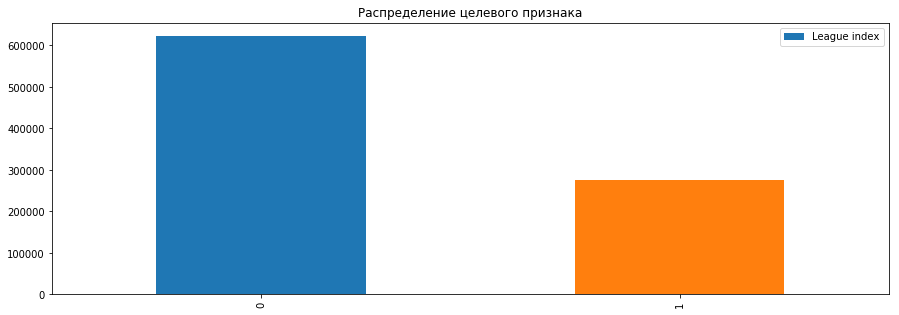

In [29]:
plt.figure(figsize=(15,5))
train_data.x.value_counts().plot('bar', label='League index')
plt.legend()
plt.title('Распределение целевого признака')

Изучение распределения целевого признака позволило понять, что набор данных является несбалансированным.
<p> Построим графики распределения остальных признаков.

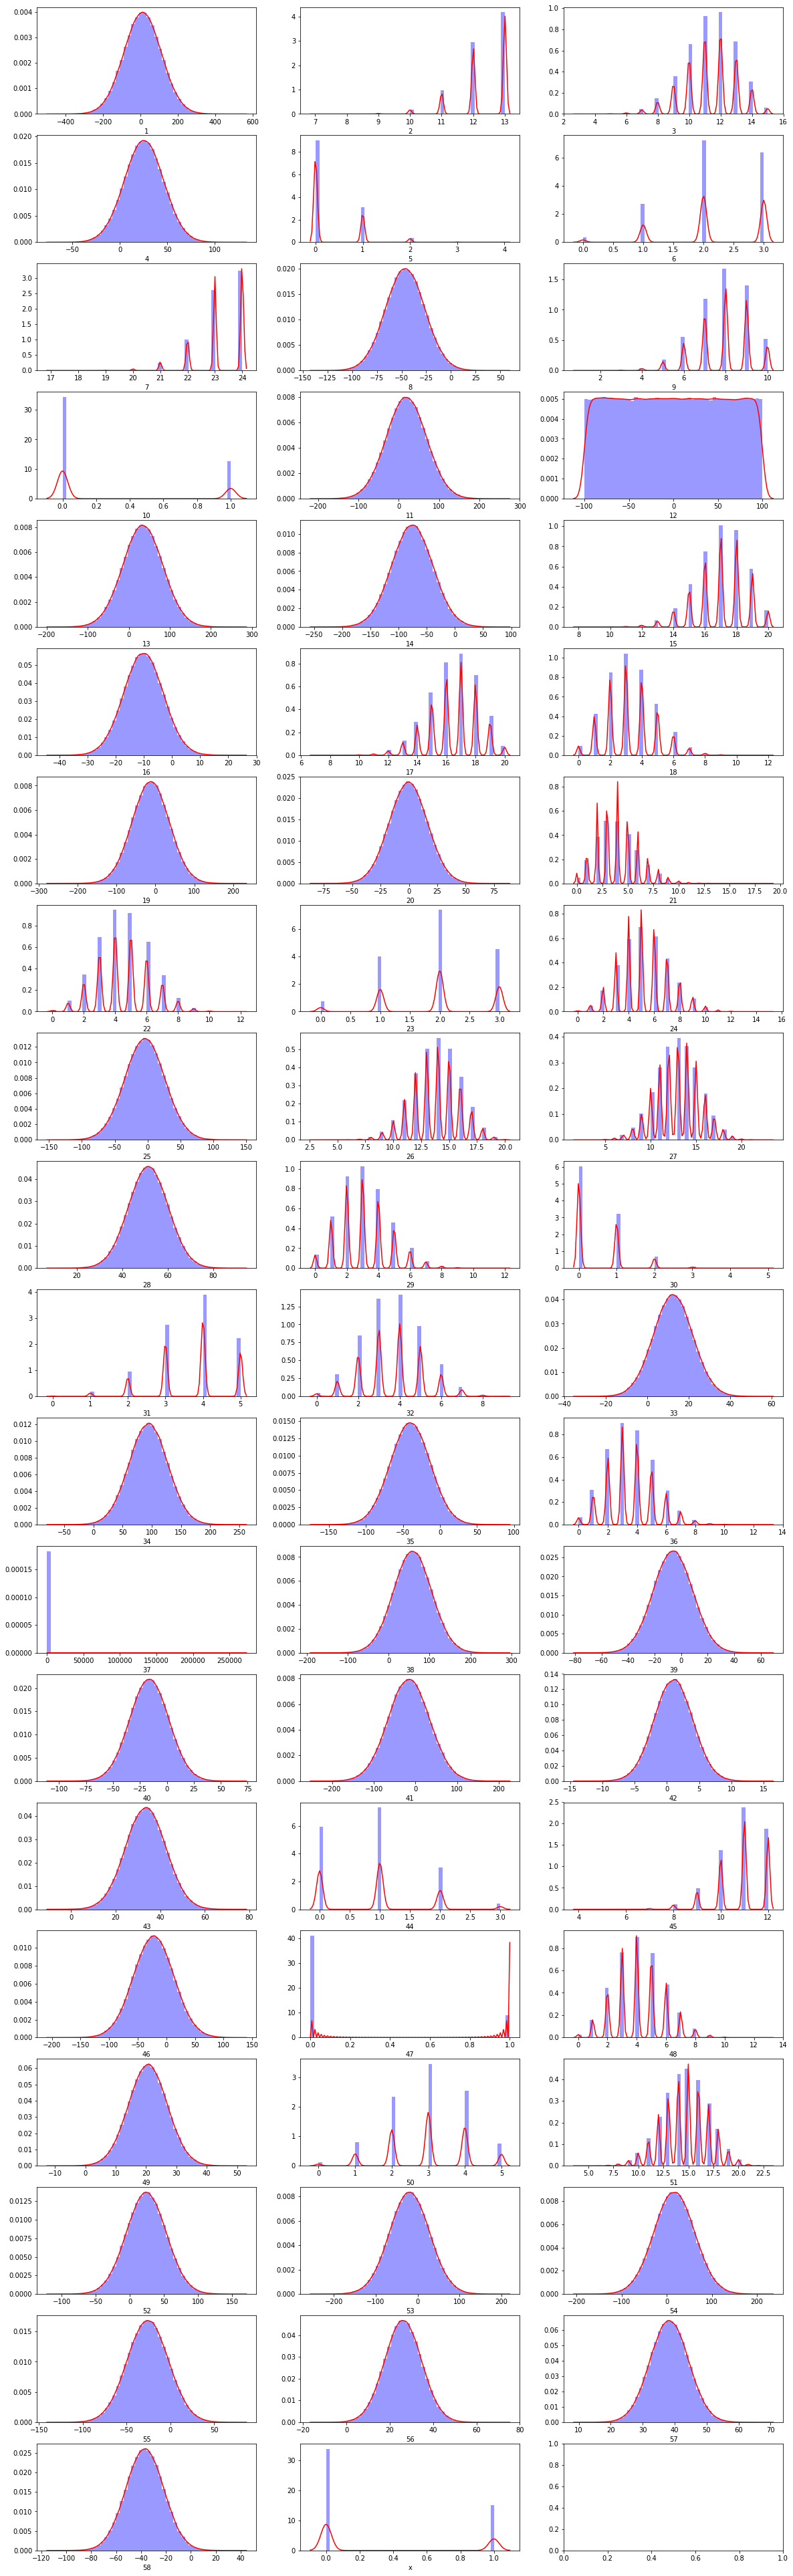

In [30]:
fig, axes = plt.subplots(nrows=20, ncols=3, figsize=(20, 70))

for idx, feat in  enumerate(train_data):
    sns.distplot((train_data[feat]).dropna(), kde_kws={'color':'r'}, hist_kws={'color':'b'}, ax=axes[int(idx / 3), idx % 3])
    #axes[int(idx / 3), idx % 3].legend()
    axes[int(idx / 3), idx % 3].set_xlabel(feat)

Из построенных графиков можно заметить, что распределение большинства признаков (не считая бинарные) является нормальным.

<p> Построим графики зависимости целевого признака от других признаков

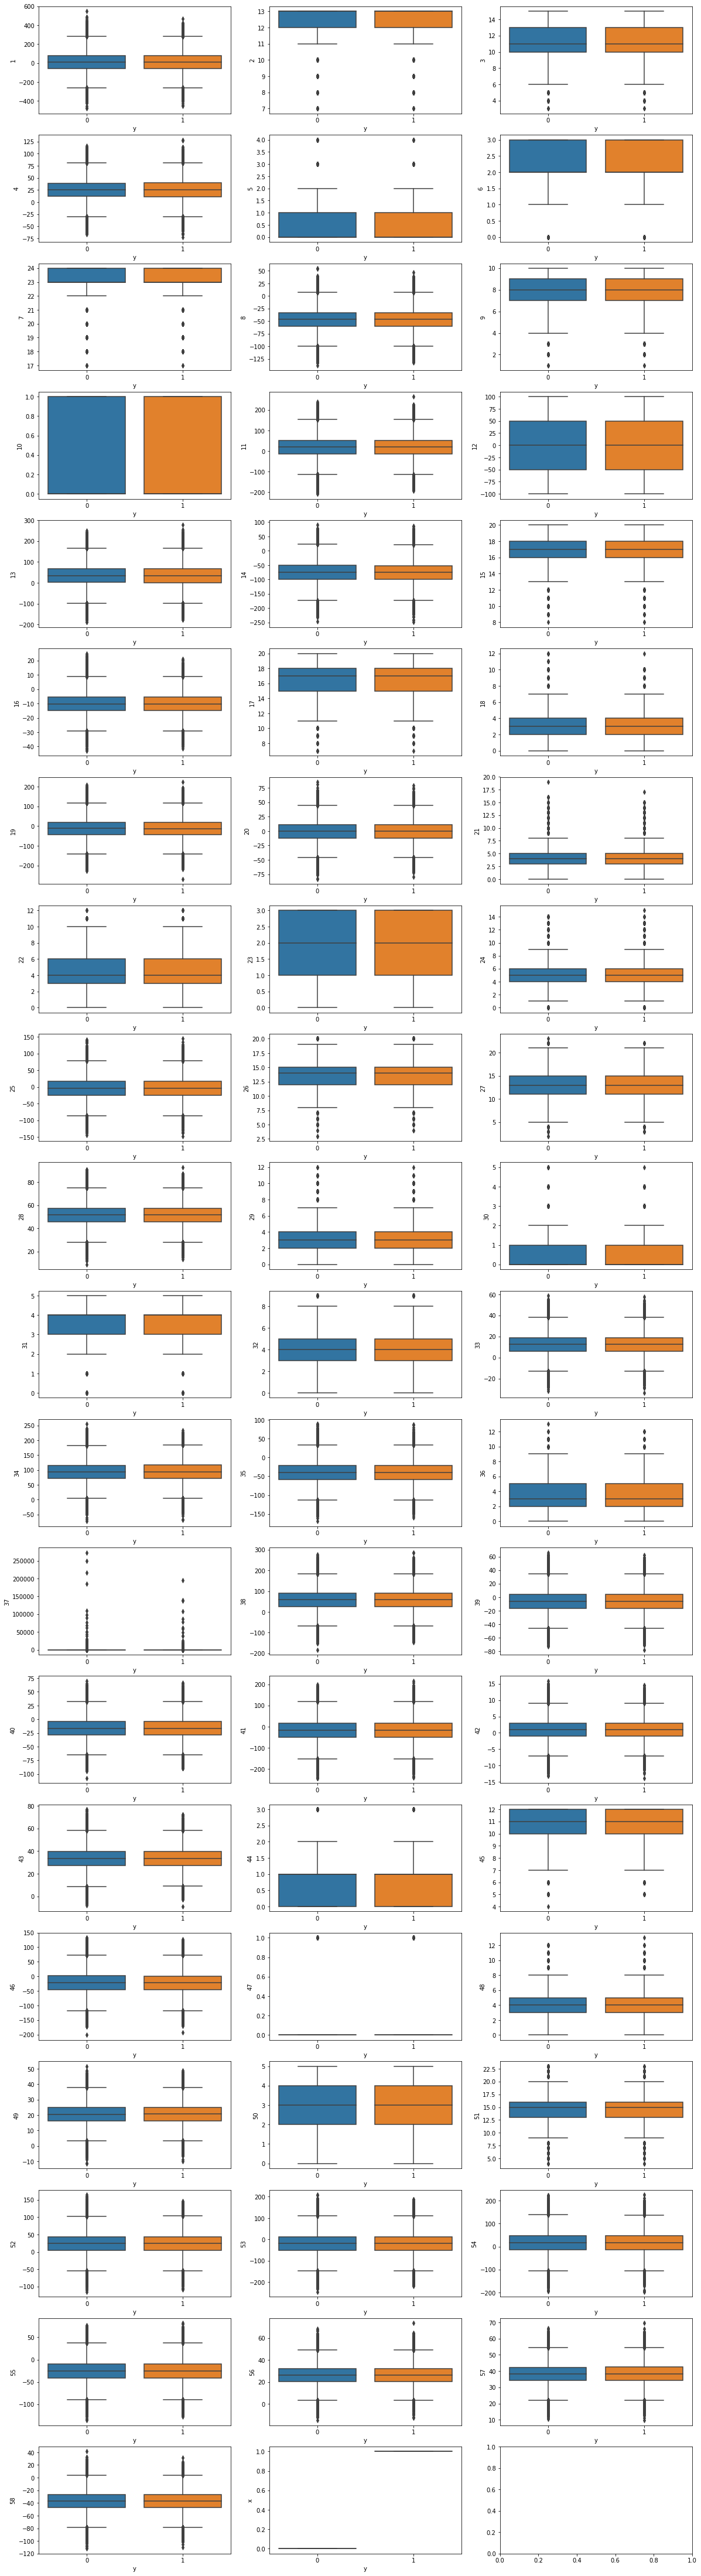

In [36]:
fig, axes = plt.subplots(nrows=20, ncols=3, figsize=(20, 80));
for idx, feat in enumerate(train_data):
    sns.boxplot(x='x', y=feat, data=train_data, ax=axes[int(idx / 3), idx % 3]);
    #axes[int(idx / 3), idx % 3].legend();
    axes[int(idx / 3), idx % 3].set_xlabel('y');
    axes[int(idx / 3), idx % 3].set_ylabel(feat);

По построенным графикам можно сказать о том, что, в целом, для обеих категорий продукта различия в показателях различаются не сильно, но в некоторых признаках имеются некоторые отличия (например, в признаках 1, 37, 38, 8 и других). 

Проведем статистический анализ признаков.

## Статистический анализ

In [37]:
train_data.groupby(['x'])[train_data.columns[:4]].agg([np.mean, np.std, np.min, np.max])

1                                              2                 \
        mean         std        amin        amax       mean       std amin   
x                                                                            
0  11.025032   99.980081 -480.088690  545.896248  12.329800  0.796550  7.0   
1  10.984239  100.002456 -453.453522  465.744341  12.329569  0.796878  7.0   

                 3                               4                        \
   amax       mean       std amin  amax       mean        std       amin   
x                                                                          
0  13.0  11.346118  1.662754  3.0  15.0  25.394461  20.627274 -66.556558   
1  13.0  11.339389  1.662077  3.0  15.0  25.432497  20.658353 -72.310070   

               
         amax  
x              
0  116.048983  
1  128.900592

In [38]:
train_data.groupby(['x'])[train_data.columns[4:9]].agg([np.mean, np.std, np.min, np.max])

5                             6                              7  \
       mean       std amin amax      mean       std amin amax       mean   
x                                                                          
0  0.313280  0.536626  0.0  4.0  2.180528  0.771599  0.0  3.0  23.222139   
1  0.313881  0.537715  0.0  4.0  2.180920  0.770636  0.0  3.0  23.222558   

                                 8                                    \
        std  amin  amax       mean        std        amin       amax   
x                                                                      
0  0.868114  17.0  24.0 -46.311092  19.882263 -138.181159  55.334255   
1  0.866605  17.0  24.0 -46.290138  19.858988 -132.633706  47.156073   

          9                       
       mean       std amin  amax  
x                                 
0  7.902369  1.287102  1.0  10.0  
1  7.899725  1.285902  1.0  10.0

Посмотрев описательные статистики признаков, предварительно сгруппировав их по целевому признаку, можно заметить, что значения признаков для обоих классов действительно несильно отличаются друг друга.

<p> Теперь посмотрим на корреляции между признаками

In [40]:
pair_corr_pearson = train_data.corr(method='pearson')
pair_corr_pearson[abs(pair_corr_pearson) > 0.3][:-1]

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,x
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
pair_corr_pearson['x'][:-1]

1    -0.000188
2    -0.000134
3    -0.001866
4     0.000850
5     0.000516
6     0.000234
7     0.000222
8     0.000486
9    -0.000947
10   -0.001792
11    0.000833
12   -0.000853
13   -0.000702
14   -0.000230
15   -0.001555
16   -0.000664
17    0.002204
18   -0.001408
19   -0.002701
20    0.000551
21    0.000006
22   -0.000231
23   -0.000721
24   -0.002654
25    0.000121
26   -0.002094
27   -0.000976
28    0.000769
29    0.001054
30    0.001215
31   -0.000563
32    0.002181
33    0.000585
34   -0.000221
35    0.000592
36    0.001550
37    0.000316
38   -0.000051
39   -0.000435
40   -0.000298
41    0.000871
42   -0.000186
43    0.000683
44    0.001903
45   -0.001171
46   -0.000895
47   -0.001334
48    0.000196
49    0.002252
50    0.001798
51   -0.000280
52   -0.000779
53   -0.001705
54    0.000170
55   -0.000969
56    0.001960
57    0.001363
58   -0.001478
Name: x, dtype: float64

Выполнение корреляционного анализа позволило понять, что между признаками отсутствуют сильные линейные зависимости.

## Моделирование

In [56]:
# загрузка необходимых библиотек
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split, StratifiedKFold

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from lightgbm import LGBMClassifier

import xgboost
from xgboost.sklearn import XGBClassifier

#### Построение модели на данных без предварительной обработки

In [66]:
train_data = load_data()
train_data.drop_duplicates(inplace=True)

X = train_data[train_data.columns[:-1]]
y = train_data[train_data.columns[-1]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.6)

In [67]:
lgb = LGBMClassifier(nthread=4, max_depth=10, n_estimators=1000, learning_rate=0.3, min_child_samples=8,
                    subsample=0.8, colsample_bytree=0.8, reg_alpha=0.7)
lgb = lgb.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=True, eval_metric='AUC', early_stopping_rounds=100)

[1]	valid_0's auc: 0.620561
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.6376
[3]	valid_0's auc: 0.661056
[4]	valid_0's auc: 0.663203
[5]	valid_0's auc: 0.663928
[6]	valid_0's auc: 0.666991
[7]	valid_0's auc: 0.674942
[8]	valid_0's auc: 0.674844
[9]	valid_0's auc: 0.676858
[10]	valid_0's auc: 0.676645
[11]	valid_0's auc: 0.688159
[12]	valid_0's auc: 0.687974
[13]	valid_0's auc: 0.689839
[14]	valid_0's auc: 0.694293
[15]	valid_0's auc: 0.694117
[16]	valid_0's auc: 0.696213
[17]	valid_0's auc: 0.698472
[18]	valid_0's auc: 0.700688
[19]	valid_0's auc: 0.701616
[20]	valid_0's auc: 0.70262
[21]	valid_0's auc: 0.704272
[22]	valid_0's auc: 0.704078
[23]	valid_0's auc: 0.703951
[24]	valid_0's auc: 0.703851
[25]	valid_0's auc: 0.703738
[26]	valid_0's auc: 0.704068
[27]	valid_0's auc: 0.703917
[28]	valid_0's auc: 0.703841
[29]	valid_0's auc: 0.703684
[30]	valid_0's auc: 0.703633
[31]	valid_0's auc: 0.703537
[32]	valid_0's auc: 0.704711
[33]	valid_0's auc: 0

In [62]:
roc_auc_score(y_val, lgb.predict_proba(X_val)[:, 1])

0.72272445817403974

Построение модели на данных без предварительной обработки позволило добиться AUC в районе ~0.72

<p> Алгоритмом прогнозирования был выбран LightGBM от компании Microsoft, потому что он быстро обучается (по сравнению с другими реализациями градиентного бустинга), может работать на данных с пропускамии, а также потому что просто лучше показывает себя лучше других моделей, которые я пробовал ранее, но в отчет не включил (модели случайных лесов, простые линейные модели, простая нейронная сеть MLPClassifier и других).

### Заполнение пустых значений и построение модели на новых данных

Для улучшения результатов попробуем отмасштабировать наши признаки, а также заполнить пропуски в столбцах медианными значениями.

In [80]:
train_data = load_data()
train_data.drop_duplicates(inplace=True)

# заполнение пропусков в признаках медианными значениями
for column in list(train_data.columns):
    train_data[column] = train_data[column].fillna(train_data[column].median())

In [81]:
# шкалирование данных для ускорения процедуры обучения
X = scale(train_data[train_data.columns[:-1]])
y = train_data[train_data.columns[-1]]

# разбиение данных на тренировочную и валидационную выборки
skf = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=2018)
for train_ind, valid_ind in skf:
    X_train, X_val = X[train_ind], X[valid_ind]
    y_train, y_val = y[train_ind], y[valid_ind]

In [82]:
# обучение модели и получение результатов
lgb = LGBMClassifier(nthread=4, max_depth=10, n_estimators=1000, learning_rate=0.3, min_child_samples=8, seed=1001,
                    subsample=0.8, colsample_bytree=0.8, reg_alpha=0.7)
lgb = lgb.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=True, eval_metric='AUC', early_stopping_rounds=100)

[1]	valid_0's auc: 0.596923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.659752
[3]	valid_0's auc: 0.66854
[4]	valid_0's auc: 0.676122
[5]	valid_0's auc: 0.675762
[6]	valid_0's auc: 0.683027
[7]	valid_0's auc: 0.683247
[8]	valid_0's auc: 0.683603
[9]	valid_0's auc: 0.683665
[10]	valid_0's auc: 0.683737
[11]	valid_0's auc: 0.683446
[12]	valid_0's auc: 0.683218
[13]	valid_0's auc: 0.684599
[14]	valid_0's auc: 0.690382
[15]	valid_0's auc: 0.69273
[16]	valid_0's auc: 0.693415
[17]	valid_0's auc: 0.698564
[18]	valid_0's auc: 0.702441
[19]	valid_0's auc: 0.705106
[20]	valid_0's auc: 0.707062
[21]	valid_0's auc: 0.707538
[22]	valid_0's auc: 0.708548
[23]	valid_0's auc: 0.709501
[24]	valid_0's auc: 0.711247
[25]	valid_0's auc: 0.711172
[26]	valid_0's auc: 0.712
[27]	valid_0's auc: 0.713471
[28]	valid_0's auc: 0.714176
[29]	valid_0's auc: 0.715494
[30]	valid_0's auc: 0.715529
[31]	valid_0's auc: 0.716372
[32]	valid_0's auc: 0.71693
[33]	valid_0's auc: 0.71

[280]	valid_0's auc: 0.742097
[281]	valid_0's auc: 0.742075
[282]	valid_0's auc: 0.742043
[283]	valid_0's auc: 0.74203
[284]	valid_0's auc: 0.742007
[285]	valid_0's auc: 0.742054
[286]	valid_0's auc: 0.742022
[287]	valid_0's auc: 0.742004
[288]	valid_0's auc: 0.741925
[289]	valid_0's auc: 0.741906
[290]	valid_0's auc: 0.741829
[291]	valid_0's auc: 0.74221
[292]	valid_0's auc: 0.742484
[293]	valid_0's auc: 0.742533
[294]	valid_0's auc: 0.74303
[295]	valid_0's auc: 0.743122
[296]	valid_0's auc: 0.743048
[297]	valid_0's auc: 0.743225
[298]	valid_0's auc: 0.743239
[299]	valid_0's auc: 0.743535
[300]	valid_0's auc: 0.744023
[301]	valid_0's auc: 0.743994
[302]	valid_0's auc: 0.743989
[303]	valid_0's auc: 0.743963
[304]	valid_0's auc: 0.743937
[305]	valid_0's auc: 0.743937
[306]	valid_0's auc: 0.744231
[307]	valid_0's auc: 0.744256
[308]	valid_0's auc: 0.74425
[309]	valid_0's auc: 0.74419
[310]	valid_0's auc: 0.744392
[311]	valid_0's auc: 0.744396
[312]	valid_0's auc: 0.744698
[313]	valid_0's

[557]	valid_0's auc: 0.749343
[558]	valid_0's auc: 0.749285
[559]	valid_0's auc: 0.749257
[560]	valid_0's auc: 0.749257
[561]	valid_0's auc: 0.749252
[562]	valid_0's auc: 0.749248
[563]	valid_0's auc: 0.749277
[564]	valid_0's auc: 0.749255
[565]	valid_0's auc: 0.749259
[566]	valid_0's auc: 0.749238
[567]	valid_0's auc: 0.749221
[568]	valid_0's auc: 0.749185
[569]	valid_0's auc: 0.749107
[570]	valid_0's auc: 0.749221
[571]	valid_0's auc: 0.749196
[572]	valid_0's auc: 0.74919
[573]	valid_0's auc: 0.749217
[574]	valid_0's auc: 0.749176
[575]	valid_0's auc: 0.749208
[576]	valid_0's auc: 0.749219
[577]	valid_0's auc: 0.749175
[578]	valid_0's auc: 0.749198
[579]	valid_0's auc: 0.749158
[580]	valid_0's auc: 0.749176
[581]	valid_0's auc: 0.749465
[582]	valid_0's auc: 0.749418
[583]	valid_0's auc: 0.749411
[584]	valid_0's auc: 0.749393
[585]	valid_0's auc: 0.749376
[586]	valid_0's auc: 0.749344
[587]	valid_0's auc: 0.749344
[588]	valid_0's auc: 0.749314
[589]	valid_0's auc: 0.749279
[590]	valid

In [83]:
roc_auc_score(y_val, lgb.predict_proba(X_val)[:, 1])

0.74946492689985167

Шкалирование признаков и заполнение пропусков в данных медианными значениями по каждому признаку позволило увеличить качество модели до AUC ~0.75

### Проведение процедуры Undersampling

Undersampling представляет из себя способ балансировки набора данных, когда для восстановления баланса классов происходиит удаление объектов мажоритарного класса.
<p> В рамках данного проекта я попробовал метод случайного удаления объектов для достижения лучшего качества.

In [84]:
from imblearn.under_sampling import RandomUnderSampler

In [85]:
train_data = load_data()
train_data.drop_duplicates(inplace=True)

# заполнение пропусков в признаках медианными значениями
for column in list(train_data.columns):
    train_data[column] = train_data[column].fillna(train_data[column].median())

rus = RandomUnderSampler()

X = train_data[train_data.columns[:-1]]
y = train_data[train_data.columns[-1]]

X_resampled, y_resampled = rus.fit_sample(X, y)

skf = StratifiedKFold(y_resampled, n_folds=10, shuffle=True, random_state=2018)
for train_ind, valid_ind in skf:
    X_train, X_val = X_resampled[train_ind], X_resampled[valid_ind]
    y_train, y_val = y_resampled[train_ind], y_resampled[valid_ind]

In [86]:
lgb = LGBMClassifier(nthread=4, max_depth=10, n_estimators=1000, learning_rate=0.2, min_child_samples=8,
                    subsample=0.8, colsample_bytree=0.8, reg_alpha=0.7)
lgb = lgb.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=True, eval_metric='AUC', early_stopping_rounds=100)

[1]	valid_0's auc: 0.595952
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.661392
[3]	valid_0's auc: 0.665036
[4]	valid_0's auc: 0.664586
[5]	valid_0's auc: 0.664227
[6]	valid_0's auc: 0.67453
[7]	valid_0's auc: 0.679035
[8]	valid_0's auc: 0.678973
[9]	valid_0's auc: 0.679208
[10]	valid_0's auc: 0.67927
[11]	valid_0's auc: 0.682119
[12]	valid_0's auc: 0.682267
[13]	valid_0's auc: 0.688619
[14]	valid_0's auc: 0.69017
[15]	valid_0's auc: 0.689993
[16]	valid_0's auc: 0.692215
[17]	valid_0's auc: 0.693135
[18]	valid_0's auc: 0.696292
[19]	valid_0's auc: 0.696293
[20]	valid_0's auc: 0.699357
[21]	valid_0's auc: 0.70038
[22]	valid_0's auc: 0.703089
[23]	valid_0's auc: 0.702984
[24]	valid_0's auc: 0.703183
[25]	valid_0's auc: 0.704791
[26]	valid_0's auc: 0.705723
[27]	valid_0's auc: 0.705936
[28]	valid_0's auc: 0.707305
[29]	valid_0's auc: 0.707824
[30]	valid_0's auc: 0.709408
[31]	valid_0's auc: 0.709671
[32]	valid_0's auc: 0.710706
[33]	valid_0's auc: 0.

[280]	valid_0's auc: 0.73696
[281]	valid_0's auc: 0.737041
[282]	valid_0's auc: 0.737382
[283]	valid_0's auc: 0.737861
[284]	valid_0's auc: 0.737825
[285]	valid_0's auc: 0.738756
[286]	valid_0's auc: 0.739012
[287]	valid_0's auc: 0.738952
[288]	valid_0's auc: 0.738905
[289]	valid_0's auc: 0.739144
[290]	valid_0's auc: 0.739168
[291]	valid_0's auc: 0.739156
[292]	valid_0's auc: 0.739188
[293]	valid_0's auc: 0.739191
[294]	valid_0's auc: 0.739113
[295]	valid_0's auc: 0.739251
[296]	valid_0's auc: 0.739224
[297]	valid_0's auc: 0.739267
[298]	valid_0's auc: 0.739207
[299]	valid_0's auc: 0.73919
[300]	valid_0's auc: 0.739118
[301]	valid_0's auc: 0.739082
[302]	valid_0's auc: 0.739044
[303]	valid_0's auc: 0.739095
[304]	valid_0's auc: 0.739036
[305]	valid_0's auc: 0.739054
[306]	valid_0's auc: 0.739059
[307]	valid_0's auc: 0.738982
[308]	valid_0's auc: 0.738964
[309]	valid_0's auc: 0.738942
[310]	valid_0's auc: 0.738913
[311]	valid_0's auc: 0.738828
[312]	valid_0's auc: 0.738827
[313]	valid_

[558]	valid_0's auc: 0.739768
[559]	valid_0's auc: 0.74
[560]	valid_0's auc: 0.740129
[561]	valid_0's auc: 0.740374
[562]	valid_0's auc: 0.740324
[563]	valid_0's auc: 0.740287
[564]	valid_0's auc: 0.740336
[565]	valid_0's auc: 0.740296
[566]	valid_0's auc: 0.740324
[567]	valid_0's auc: 0.740329
[568]	valid_0's auc: 0.740321
[569]	valid_0's auc: 0.740295
[570]	valid_0's auc: 0.740198
[571]	valid_0's auc: 0.740152
[572]	valid_0's auc: 0.740131
[573]	valid_0's auc: 0.740126
[574]	valid_0's auc: 0.740126
[575]	valid_0's auc: 0.740118
[576]	valid_0's auc: 0.740087
[577]	valid_0's auc: 0.740084
[578]	valid_0's auc: 0.740094
[579]	valid_0's auc: 0.740118
[580]	valid_0's auc: 0.740143
[581]	valid_0's auc: 0.740203
[582]	valid_0's auc: 0.740221
[583]	valid_0's auc: 0.740234
[584]	valid_0's auc: 0.740246
[585]	valid_0's auc: 0.740274
[586]	valid_0's auc: 0.740278
[587]	valid_0's auc: 0.74034
[588]	valid_0's auc: 0.740305
[589]	valid_0's auc: 0.740507
[590]	valid_0's auc: 0.740522
[591]	valid_0's

In [87]:
roc_auc_score(y_val, lgb.predict_proba(X_val)[:, 1])

0.74168193557339379

К сожалению, проведение процедуры случайного удаления объектов не позволила улучшить результат.

### Отбор признаков для улучшения качества прогнозов

Для улучшения качества моделей проводилась процедура отбора признаков при помощи модели случайного леса.

In [30]:
train_data = load_data()
train_data.drop_duplicates(inplace=True)

for column in list(train_data.columns):
    train_data[column] = train_data[column].fillna(train_data[column].median())

In [32]:
X = scale(train_data[train_data.columns[:-1]])
y = train_data[train_data.columns[-1]]

skf = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=2018)
for train_ind, valid_ind in skf:
    X_train, X_val = X[train_ind], X[valid_ind]
    y_train, y_val = y[train_ind], y[valid_ind]

In [33]:
# обучение модели случайного леса
rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10).fit(X_train, y_train)

In [34]:
roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])

0.62529727763791998

Feature importances for selected model:


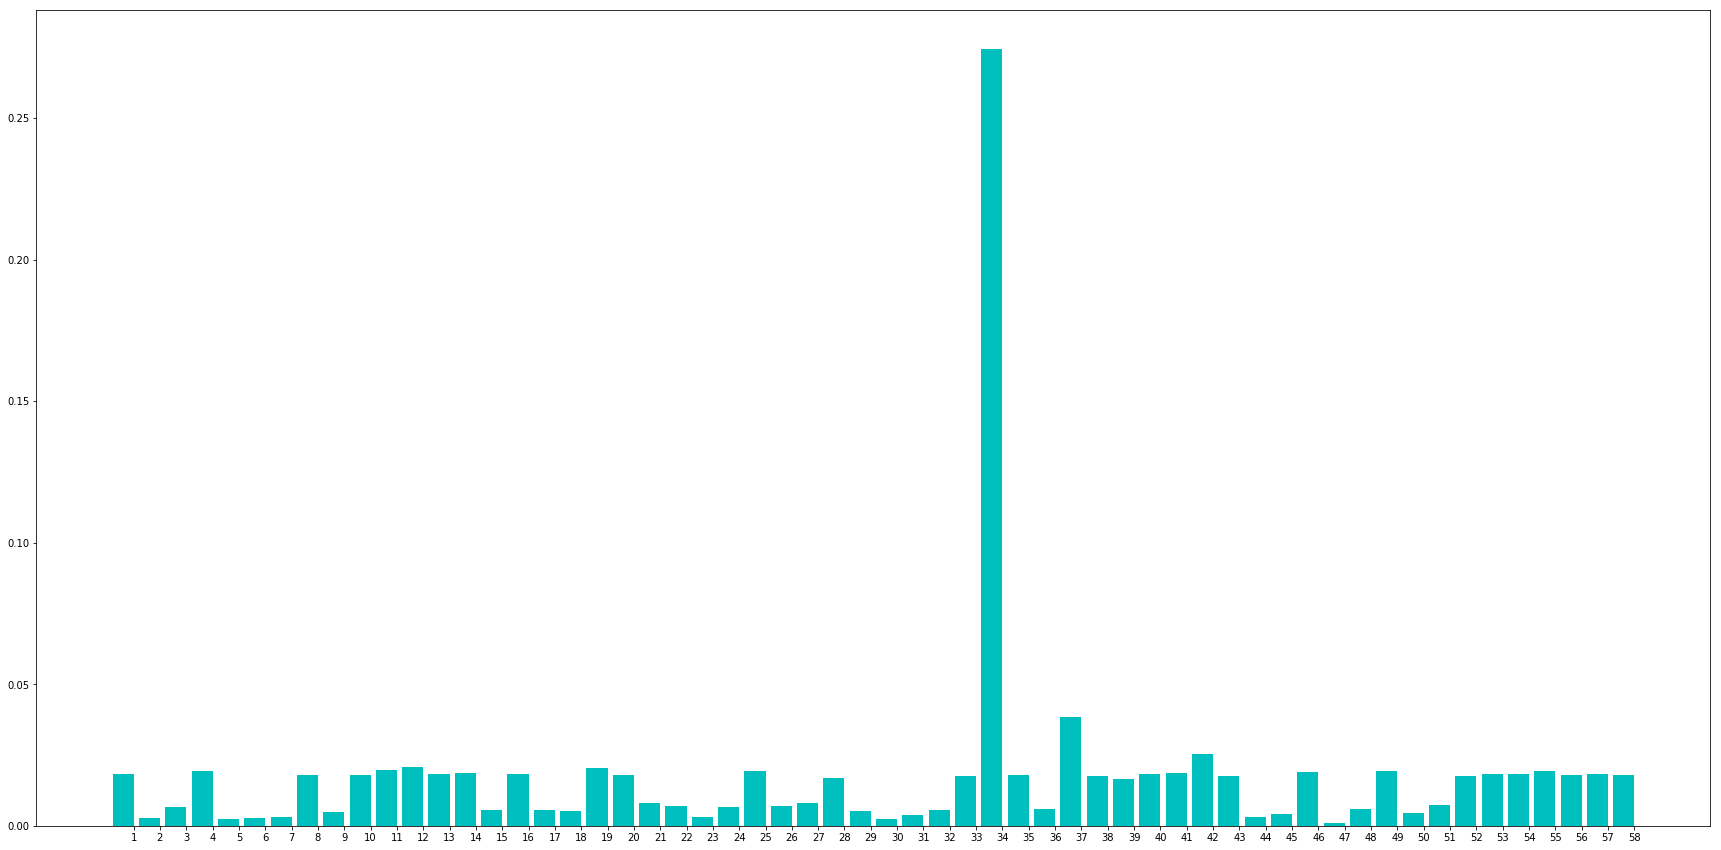

Table of feature importances for selected model: 


In [35]:
# получение информации о важности признаков
print("Feature importances for selected model:")
importance = rf.feature_importances_
plt.figure(figsize=(30,15))
idx = np.arange(importance.size)
width = 0.8
p1 = plt.bar(idx, importance, width, color='c')
plt.xticks(idx+width/2, (train_data.columns[:-1]))[1]
plt.show()

print('Table of feature importances for selected model: ')
importances_table = pd.DataFrame(columns=['feature','importance'])
importances_table.feature = train_data.columns[:-1]

for i in range(len(importances_table.feature)):
    importances_table.importance[i] = round(importance[i]*100, 2)

importances_table = importances_table.sort_values('importance', ascending=False)

Из графика видно, что наибольшее влияние на итоговый результат оказывает признак 34. Все остальные признаки оказывают сравнимо одинаковые и незначительные эффекты на итоговый прогноз.

In [36]:
importances_table[:15]

,feature,importance
33,34,27.43
36,37,3.83
41,42,2.55
11,12,2.07
18,19,2.03
10,11,1.99
54,55,1.95
3,4,1.94
24,25,1.93
48,49,1.93


In [37]:
# отберем первые 15 важных признаков
important_feats = importances_table[:15].feature.tolist()

In [38]:
X = scale(train_data[important_feats])
y = train_data[train_data.columns[-1]]

skf = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=2018)
for train_ind, valid_ind in skf:
    X_train, X_val = X[train_ind], X[valid_ind]
    y_train, y_val = y[train_ind], y[valid_ind]

In [41]:
# обучим модель на данных с отобранными важными признаками
lgb = LGBMClassifier(nthread=4, max_depth=10, n_estimators=1000, learning_rate=0.2, min_child_samples=8, seed=128,
                    subsample=0.8, colsample_bytree=0.8, reg_alpha=0.7)
lgb = lgb.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=True, eval_metric='AUC', early_stopping_rounds=150)

[1]	valid_0's auc: 0.598553
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's auc: 0.659574
[3]	valid_0's auc: 0.660066
[4]	valid_0's auc: 0.668213
[5]	valid_0's auc: 0.67753
[6]	valid_0's auc: 0.676843
[7]	valid_0's auc: 0.682876
[8]	valid_0's auc: 0.685603
[9]	valid_0's auc: 0.687723
[10]	valid_0's auc: 0.688913
[11]	valid_0's auc: 0.691366
[12]	valid_0's auc: 0.69147
[13]	valid_0's auc: 0.693159
[14]	valid_0's auc: 0.695235
[15]	valid_0's auc: 0.696403
[16]	valid_0's auc: 0.697611
[17]	valid_0's auc: 0.697592
[18]	valid_0's auc: 0.698133
[19]	valid_0's auc: 0.699968
[20]	valid_0's auc: 0.699807
[21]	valid_0's auc: 0.700556
[22]	valid_0's auc: 0.701918
[23]	valid_0's auc: 0.702808
[24]	valid_0's auc: 0.703873
[25]	valid_0's auc: 0.704813
[26]	valid_0's auc: 0.704939
[27]	valid_0's auc: 0.704974
[28]	valid_0's auc: 0.705672
[29]	valid_0's auc: 0.70619
[30]	valid_0's auc: 0.706204
[31]	valid_0's auc: 0.706735
[32]	valid_0's auc: 0.707558
[33]	valid_0's auc: 0

[279]	valid_0's auc: 0.733336
[280]	valid_0's auc: 0.733321
[281]	valid_0's auc: 0.73327
[282]	valid_0's auc: 0.733279
[283]	valid_0's auc: 0.733268
[284]	valid_0's auc: 0.73328
[285]	valid_0's auc: 0.733218
[286]	valid_0's auc: 0.733199
[287]	valid_0's auc: 0.733163
[288]	valid_0's auc: 0.733179
[289]	valid_0's auc: 0.73334
[290]	valid_0's auc: 0.733568
[291]	valid_0's auc: 0.733555
[292]	valid_0's auc: 0.733729
[293]	valid_0's auc: 0.733732
[294]	valid_0's auc: 0.733708
[295]	valid_0's auc: 0.733706
[296]	valid_0's auc: 0.733695
[297]	valid_0's auc: 0.733675
[298]	valid_0's auc: 0.733823
[299]	valid_0's auc: 0.733832
[300]	valid_0's auc: 0.733813
[301]	valid_0's auc: 0.73381
[302]	valid_0's auc: 0.734155
[303]	valid_0's auc: 0.734753
[304]	valid_0's auc: 0.734743
[305]	valid_0's auc: 0.734882
[306]	valid_0's auc: 0.734982
[307]	valid_0's auc: 0.734988
[308]	valid_0's auc: 0.734976
[309]	valid_0's auc: 0.734983
[310]	valid_0's auc: 0.734953
[311]	valid_0's auc: 0.734923
[312]	valid_0'

[556]	valid_0's auc: 0.736124
[557]	valid_0's auc: 0.736296
[558]	valid_0's auc: 0.736441
[559]	valid_0's auc: 0.73643
[560]	valid_0's auc: 0.736364
[561]	valid_0's auc: 0.736384
[562]	valid_0's auc: 0.736398
[563]	valid_0's auc: 0.736398
[564]	valid_0's auc: 0.736497
[565]	valid_0's auc: 0.736571
[566]	valid_0's auc: 0.736637
[567]	valid_0's auc: 0.736628
[568]	valid_0's auc: 0.736659
[569]	valid_0's auc: 0.736698
[570]	valid_0's auc: 0.73669
[571]	valid_0's auc: 0.736671
[572]	valid_0's auc: 0.736672
[573]	valid_0's auc: 0.73667
[574]	valid_0's auc: 0.736662
[575]	valid_0's auc: 0.736652
[576]	valid_0's auc: 0.736646
[577]	valid_0's auc: 0.736623
[578]	valid_0's auc: 0.736609
[579]	valid_0's auc: 0.736608
[580]	valid_0's auc: 0.736594
[581]	valid_0's auc: 0.736573
[582]	valid_0's auc: 0.736521
[583]	valid_0's auc: 0.73655
[584]	valid_0's auc: 0.736549
[585]	valid_0's auc: 0.736542
[586]	valid_0's auc: 0.736495
[587]	valid_0's auc: 0.73654
[588]	valid_0's auc: 0.736527
[589]	valid_0's

[835]	valid_0's auc: 0.740039
[836]	valid_0's auc: 0.740043
[837]	valid_0's auc: 0.740032
[838]	valid_0's auc: 0.740013
[839]	valid_0's auc: 0.740002
[840]	valid_0's auc: 0.739984
[841]	valid_0's auc: 0.73997
[842]	valid_0's auc: 0.739957
[843]	valid_0's auc: 0.739958
[844]	valid_0's auc: 0.739956
[845]	valid_0's auc: 0.73996
[846]	valid_0's auc: 0.739955
[847]	valid_0's auc: 0.739952
[848]	valid_0's auc: 0.739915
[849]	valid_0's auc: 0.739895
[850]	valid_0's auc: 0.739908
[851]	valid_0's auc: 0.739899
[852]	valid_0's auc: 0.739866
[853]	valid_0's auc: 0.73988
[854]	valid_0's auc: 0.739881
[855]	valid_0's auc: 0.73985
[856]	valid_0's auc: 0.73979
[857]	valid_0's auc: 0.739797
[858]	valid_0's auc: 0.73977
[859]	valid_0's auc: 0.739751
[860]	valid_0's auc: 0.739826
[861]	valid_0's auc: 0.740103
[862]	valid_0's auc: 0.740123
[863]	valid_0's auc: 0.740117
[864]	valid_0's auc: 0.740203
[865]	valid_0's auc: 0.740228
[866]	valid_0's auc: 0.740203
[867]	valid_0's auc: 0.740203
[868]	valid_0's 

In [42]:
roc_auc_score(y_val, lgb.predict_proba(X_val)[:, 1])

0.7402783476931335

Процедура отбора признаков также не позволила добиться лучшего результат.

# Решение

Таким образом, итоговой моделью, показывающий наилучший результат в районе AUC=0.75 получается LightGBM, обученный на отмасштабированных данных с заполненными медианными значениями пропусками в данных.

In [88]:
train_data = load_data()
train_data.drop_duplicates(inplace=True)

for column in list(train_data.columns):
    train_data[column] = train_data[column].fillna(train_data[column].median())
    
X = scale(train_data[train_data.columns[:-1]])
y = train_data[train_data.columns[-1]]

skf = StratifiedKFold(y, n_folds=10, shuffle=True, random_state=2018)
for train_ind, valid_ind in skf:
    X_train, X_val = X[train_ind], X[valid_ind]
    y_train, y_val = y[train_ind], y[valid_ind]
    
    
lgb = LGBMClassifier(nthread=4, max_depth=10, n_estimators=1000, learning_rate=0.3, min_child_samples=8, seed=1001,
                    subsample=0.8, colsample_bytree=0.8, reg_alpha=0.7)
lgb = lgb.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=True, eval_metric='AUC', early_stopping_rounds=100)

[1]	valid_0's auc: 0.596923
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.659752
[3]	valid_0's auc: 0.66854
[4]	valid_0's auc: 0.676122
[5]	valid_0's auc: 0.675762
[6]	valid_0's auc: 0.683027
[7]	valid_0's auc: 0.683247
[8]	valid_0's auc: 0.683603
[9]	valid_0's auc: 0.683665
[10]	valid_0's auc: 0.683737
[11]	valid_0's auc: 0.683446
[12]	valid_0's auc: 0.683218
[13]	valid_0's auc: 0.684599
[14]	valid_0's auc: 0.690382
[15]	valid_0's auc: 0.69273
[16]	valid_0's auc: 0.693415
[17]	valid_0's auc: 0.698564
[18]	valid_0's auc: 0.702441
[19]	valid_0's auc: 0.705106
[20]	valid_0's auc: 0.707062
[21]	valid_0's auc: 0.707538
[22]	valid_0's auc: 0.708548
[23]	valid_0's auc: 0.709501
[24]	valid_0's auc: 0.711247
[25]	valid_0's auc: 0.711172
[26]	valid_0's auc: 0.712
[27]	valid_0's auc: 0.713471
[28]	valid_0's auc: 0.714176
[29]	valid_0's auc: 0.715494
[30]	valid_0's auc: 0.715529
[31]	valid_0's auc: 0.716372
[32]	valid_0's auc: 0.71693
[33]	valid_0's auc: 0.71

[277]	valid_0's auc: 0.74189
[278]	valid_0's auc: 0.741888
[279]	valid_0's auc: 0.74199
[280]	valid_0's auc: 0.742097
[281]	valid_0's auc: 0.742075
[282]	valid_0's auc: 0.742043
[283]	valid_0's auc: 0.74203
[284]	valid_0's auc: 0.742007
[285]	valid_0's auc: 0.742054
[286]	valid_0's auc: 0.742022
[287]	valid_0's auc: 0.742004
[288]	valid_0's auc: 0.741925
[289]	valid_0's auc: 0.741906
[290]	valid_0's auc: 0.741829
[291]	valid_0's auc: 0.74221
[292]	valid_0's auc: 0.742484
[293]	valid_0's auc: 0.742533
[294]	valid_0's auc: 0.74303
[295]	valid_0's auc: 0.743122
[296]	valid_0's auc: 0.743048
[297]	valid_0's auc: 0.743225
[298]	valid_0's auc: 0.743239
[299]	valid_0's auc: 0.743535
[300]	valid_0's auc: 0.744023
[301]	valid_0's auc: 0.743994
[302]	valid_0's auc: 0.743989
[303]	valid_0's auc: 0.743963
[304]	valid_0's auc: 0.743937
[305]	valid_0's auc: 0.743937
[306]	valid_0's auc: 0.744231
[307]	valid_0's auc: 0.744256
[308]	valid_0's auc: 0.74425
[309]	valid_0's auc: 0.74419
[310]	valid_0's a

[556]	valid_0's auc: 0.749399
[557]	valid_0's auc: 0.749343
[558]	valid_0's auc: 0.749285
[559]	valid_0's auc: 0.749257
[560]	valid_0's auc: 0.749257
[561]	valid_0's auc: 0.749252
[562]	valid_0's auc: 0.749248
[563]	valid_0's auc: 0.749277
[564]	valid_0's auc: 0.749255
[565]	valid_0's auc: 0.749259
[566]	valid_0's auc: 0.749238
[567]	valid_0's auc: 0.749221
[568]	valid_0's auc: 0.749185
[569]	valid_0's auc: 0.749107
[570]	valid_0's auc: 0.749221
[571]	valid_0's auc: 0.749196
[572]	valid_0's auc: 0.74919
[573]	valid_0's auc: 0.749217
[574]	valid_0's auc: 0.749176
[575]	valid_0's auc: 0.749208
[576]	valid_0's auc: 0.749219
[577]	valid_0's auc: 0.749175
[578]	valid_0's auc: 0.749198
[579]	valid_0's auc: 0.749158
[580]	valid_0's auc: 0.749176
[581]	valid_0's auc: 0.749465
[582]	valid_0's auc: 0.749418
[583]	valid_0's auc: 0.749411
[584]	valid_0's auc: 0.749393
[585]	valid_0's auc: 0.749376
[586]	valid_0's auc: 0.749344
[587]	valid_0's auc: 0.749344
[588]	valid_0's auc: 0.749314
[589]	valid

In [90]:
X_test = pd.read_csv('xtest.csv')

for column in list(X_test.columns):
    X_test[column] = X_test[column].fillna(X_test[column].median())
    
X_test = scale(X_test)
    
pred = lgb.predict_proba(X_test)[:, 1]

pred_df = pd.DataFrame(data = pred, dtype='float64')

pred_df.to_csv('results.csv', index=False)

Итоговые результаты прогноза (вероятность прогнозирования класса 1) находятся в файле results.csv

In [91]:
pred_df

,0
0,0.195502
1,0.078374
2,0.822603
3,0.198506
4,0.099208
5,0.235571
6,0.205197
7,0.857365
8,0.682491
9,0.124930
